Sales Prediction

importing the necessary modules

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

reading the data from the csv file

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

dropping the non required columns

In [ ]:
df.drop('Unnamed: 0',axis= 1, inplace = True)

To check for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Visualizing the relationships between the attributes and output attribute

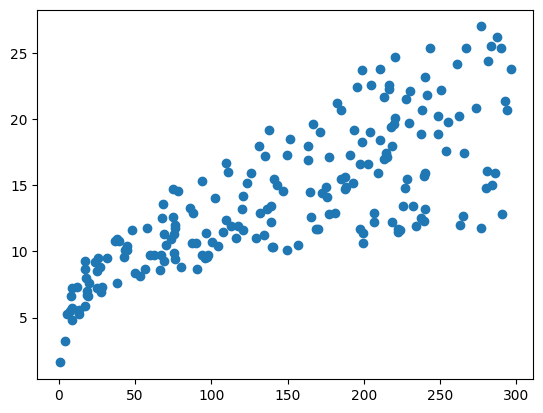

In [ ]:
plt.scatter(df['TV'], df['Sales'])

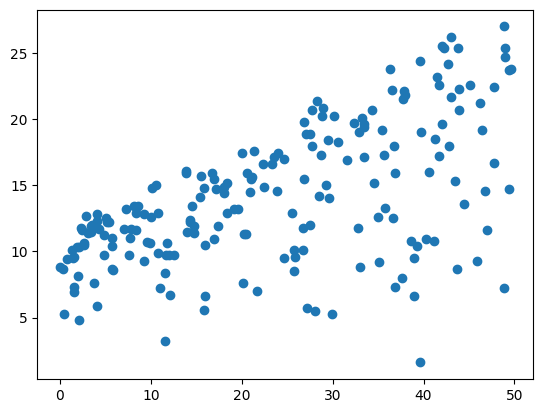

In [ ]:
plt.scatter(df['Radio'], df['Sales'])

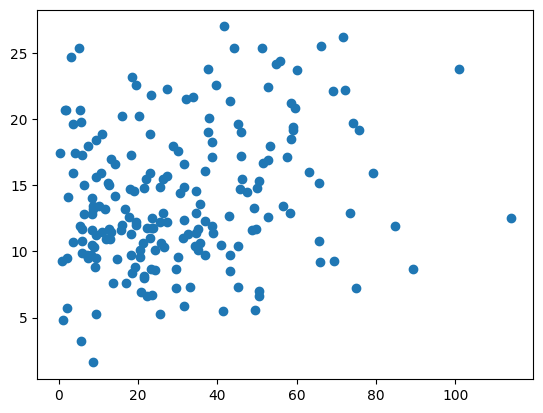

In [ ]:
plt.scatter(df['Newspaper'], df['Sales'])

In [ ]:
df = df[df['Newspaper'] < 80]

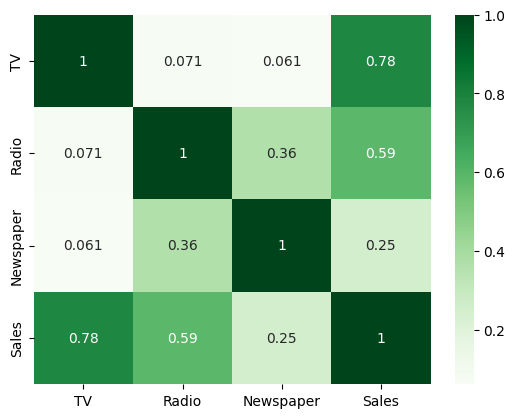

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap = "Greens")

plt.show()

Training a Random Forest Regressor model on a dataset with weighted features, using mean absolute error as the split quality criterion, and calculates feature importances to prioritize relevant features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:3], df['Sales'], test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=60, random_state=42, criterion = 'absolute_error')
rf.fit(X_train, y_train)
importances = rf.feature_importances_

importances_norm = importances / np.sum(importances)

X_train_weighted = X_train * importances_norm
X_test_weighted = X_test * importances_norm




performing scaling of attributes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_weighted = scaler.fit_transform(X_train_weighted)
X_test_weighted = scaler.transform(X_test_weighted)


Training a model using attributes to predict a target variable

In [ ]:
rf_weighted = RandomForestRegressor(n_estimators=50, random_state=42)
rf_weighted.fit(X_train_weighted, y_train)

y_pred_weighted = rf_weighted.predict(X_test_weighted)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)

print(f"MSE: {mse_weighted:.2f}")

MSE: 0.48


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_pred_weighted, y_test))

0.9800514911565388
